<a href="https://colab.research.google.com/github/Ansebi/AdjustedMAPE/blob/main/AdjustedMAPE_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [270]:
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
from matplotlib import pyplot as plt

# Definitions

In [271]:
def nomalize_minmax_reference(reference, sequence):
  return (sequence - reference.min()) / (reference.max() - reference.min())

In [272]:
def get_adjusted_mape_bias(y_: np.array):
  return (y_- y_.min()).mean() - y_.min()

In [273]:
def adjusted_mape(
    y_true: np.array,
    y_pred: np.array,
    true_scope=None):
  if not true_scope:
    true_scope = y_true
  amape_bias = get_adjusted_mape_bias(true_scope)
  amape = 100 * mean_absolute_percentage_error(
      y_true + amape_bias,
      y_pred + amape_bias
      )
  return amape

# Introduction to AdjustedMAPE

## Small example

In [274]:
real = np.array([10,20,30,40,50])
pred = np.array([11,22,33,44,55])

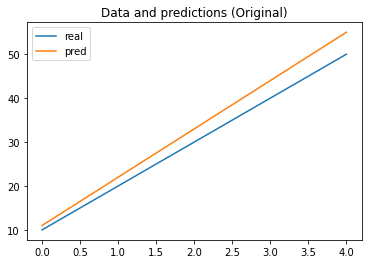

In [275]:
plt.title('Data and predictions (Original)')
plt.plot(range(len(real)), real, label='real')
plt.plot(range(len(real)), pred, label='pred')
plt.legend()
plt.show()

In [276]:
mape = 100 * mean_absolute_percentage_error(real, pred)
print(f"MAPE: {mape:.1f}%")

MAPE: 10.0%


In [277]:
amape = adjusted_mape(real, pred)
print(f"AMAPE: {amape:.1f}%")

AMAPE: 7.1%


## What if we normalize the data?

In [278]:
real_norm = nomalize_minmax_reference(real, real)
pred_norm = nomalize_minmax_reference(real, pred)
print(f"Real observations normalized: {'   '.join([str(i) for i in real_norm])}")
print(f"Predicted values normalized: {'   '.join([str(i) for i in pred_norm])}")

Real observations normalized: 0.0   0.25   0.5   0.75   1.0
Predicted values normalized: 0.025   0.3   0.575   0.85   1.125


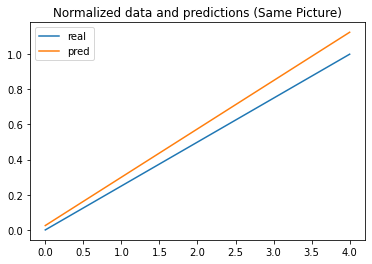

In [279]:
plt.title('Normalized data and predictions (Same Picture)')
plt.plot(range(len(real)), real_norm, label='real')
plt.plot(range(len(real)), pred_norm, label='pred')
plt.legend()
plt.show()

In [280]:
# @title Here comes the problem:
mape_norm = 100 * mean_absolute_percentage_error(real_norm, pred_norm)
print(f"Normalized data MAPE: {mape_norm:.1f}%")

Normalized data MAPE: 2251799813685260.5%


In [281]:
# @title AMAPE remains adequate.<br>It evaluates the normalized rate of error...<br>thus solving two problems at one time.
amape_norm = adjusted_mape(real_norm, pred_norm)
print(f"Normalized data AMAPE: {amape_norm:.1f}%")

Normalized data AMAPE: 7.1%


## Test extreme cases

In [282]:
# @title there are situations when AMAPE is not enough...
real = np.array([0,1])
pred = np.array([1,1])

mape = 100 * mean_absolute_percentage_error(real, pred)
print(f"MAPE: {mape:.1f}%")
amape = adjusted_mape(real, pred)
print(f"AMAPE: {amape:.1f}%")

MAPE: 225179981368524800.0%
AMAPE: 100.0%


In [283]:
def bulletproof_mape(
    y_true: np.array,
    y_pred: np.array,
    true_scope=None):
  if not true_scope:
    true_scope = y_true
  amape_bias = get_adjusted_mape_bias(true_scope)
  amape = 100 * mean_absolute_percentage_error(
      y_true + amape_bias + y_true.mean()/len(y_true),
      y_pred + amape_bias + y_true.mean()/len(y_true)
      )
  return amape

In [284]:
real = np.array([0,1])
pred = np.array([1,1])

mape = 100 * mean_absolute_percentage_error(real, pred)
print(f"MAPE: {mape:.1f}%")
amape = adjusted_mape(real, pred)
print(f"AMAPE: {amape:.1f}%")
bamape = bulletproof_mape(real, pred)
print(f"BAMAPE: {bamape:.1f}%")

MAPE: 225179981368524800.0%
AMAPE: 100.0%
BAMAPE: 66.7%


In [285]:
real = np.array([0,0,0,0,10,12,12,0,0,0,0])
pred = np.array([0.1,1,1,1,10,12,12,1,-1,1,-1])
mape = 100 * mean_absolute_percentage_error(real, pred)
print(f"MAPE: {mape:.1f}%")
amape = adjusted_mape(real, pred)
print(f"AMAPE: {amape:.1f}%")

MAPE: 290686885039368320.0%
AMAPE: 20.9%


In [286]:
real = np.array([0,0,0,0,10,12,12,0,0,0,0])
pred = np.array([0.1,1,1,1,10,12,12,1,-1,1,-1])
mape = 100 * mean_absolute_percentage_error(real, pred)
print(f"MAPE: {mape:.1f}%")
amape = adjusted_mape(real, pred)
print(f"AMAPE: {amape:.1f}%")
bamape = bulletproof_mape(real, pred)
print(f"BAMAPE: {bamape:.1f}%")

MAPE: 290686885039368320.0%
AMAPE: 20.9%
BAMAPE: 19.1%


In [287]:
real = np.array([0,0,0,10])
pred = np.array([10,20,30,40])

mape = 100 * mean_absolute_percentage_error(real, pred)
print(f"MAPE: {mape:.1f}%")
amape = adjusted_mape(real, pred)
print(f"AMAPE: {amape:.1f}%")
bamape = bulletproof_mape(real, pred)
print(f"BAMAPE: {bamape:.1f}%")

MAPE: 6755399441055744000.0%
AMAPE: 660.0%
BAMAPE: 537.1%


In [288]:
real = np.array([100,200,300,0])
pred = np.array([100,200,300,1])

mape = 100 * mean_absolute_percentage_error(real, pred)
print(f"MAPE: {mape:.1f}%")
amape = adjusted_mape(real, pred)
print(f"AMAPE: {amape:.1f}%")
bamape = bulletproof_mape(real, pred)
print(f"BAMAPE: {bamape:.1f}%")

MAPE: 112589990684262400.0%
AMAPE: 0.2%
BAMAPE: 0.1%


In [289]:
error_rate = "20%" 
n = 10
factor = 10e-8
noise_factor = 2
real = np.random.randint(-100, 100, n) * factor
noise = (np.random.rand(n) - 0.5) * noise_factor
pred = real * (1 + float(error_rate[:-1])/100) * (1 + noise)

mape = 100 * mean_absolute_percentage_error(real, pred)
print(f"MAPE: {mape:.1f}%")
amape = adjusted_mape(real, pred)
print(f"AMAPE: {amape:.1f}%")
bamape = bulletproof_mape(real, pred)
print(f"BAMAPE: {bamape:.1f}%")

MAPE: 63.4%
AMAPE: 17.7%
BAMAPE: 17.6%
